IMPORTS, CONSTANTS, AND BASIC SETUP

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#setting our equation parameters
alpha = 1.5
beta = 1.1
gamma = 2.5
delta = 1.4
kappa = 0.5

numX1Pts = 30
numX2Pts = 30 

#setting up our ranges for x1, x2, and t in that order based on given problem statement
x1Range = np.linspace(start=0, stop=5, num=numX1Pts)
x2Range = np.linspace(start=0, stop=5, num=numX2Pts)
tRange = np.linspace(start=0, stop=20, num=2000)

x1, x2 = np.meshgrid(x1Range, x2Range)



CREATING VECTOR FIELD

In [3]:

#setting up our derivative functions for x1(t) and x2(t) respectively. u represents the horizontal component of the vector and v represents the vertical component
def dx1dt(x1, x2) -> float:
    return -alpha * x1 + beta * x1 * x2

def dx2dt(x1, x2) -> float: 
    return gamma * (1 - kappa * x2) * x2 - delta * x1 * x2

u = dx1dt(x1, x2)
v = dx2dt(x1, x2)




GETTING NULLCLINES AND EQUILIBRIUM POINTS

In [4]:
#v-nullcline 1: x1 = 0
v_nullcline_1 = [np.zeros(shape=(numX1Pts,)), x2Range]


#v-nullcline 2: x2 = alpha / beta
v_nullcline_2 = [x1Range, np.full((numX2Pts,), alpha/beta)]

#h-nullcline 1: x2=0
h_nullcline_1 = [x1Range, np.zeros(shape=numX2Pts)]

#h-nullcline 2: x2 = 1 / kappa - (delta * x1) / (gamma * kappa) 
x2_vals = []
for x1_v in x1Range:
    x2_vals.append(1 / kappa - (delta * x1_v) / (gamma * kappa))

h_nullcline_2 = [x1Range, x2_vals]

#EQUILIBRIUM POINTS
eq_points_x1 = [0, 0, ((alpha / beta) - (1 / kappa)) * -gamma * kappa / delta]
eq_points_x2 = [0, 1 / kappa, alpha / beta]

In [5]:
#dSdt returns a vector of dx1dt and dx2dt that odeint can use 
def dSdt(t : float, S : tuple):
    x1, x2 = S
    return [dx1dt(x1, x2), dx2dt(x1,x2)]

init_1 = (5, 1)
init_2 = (1, 5)

#based on odeint formatting with our given dSdt, we need to take the transpose and then use that to plot our solution curves
S_0 = odeint(dSdt, y0=init_1, t=tRange, tfirst = True)
x1_0 = S_0.T[0] 
x2_0 = S_0.T[1]

S_1 = odeint(dSdt, y0=init_2, t=tRange, tfirst=True)
x1_1 = S_1.T[0]
x2_1 = S_1.T[1]

PLOTTING GRAPHS

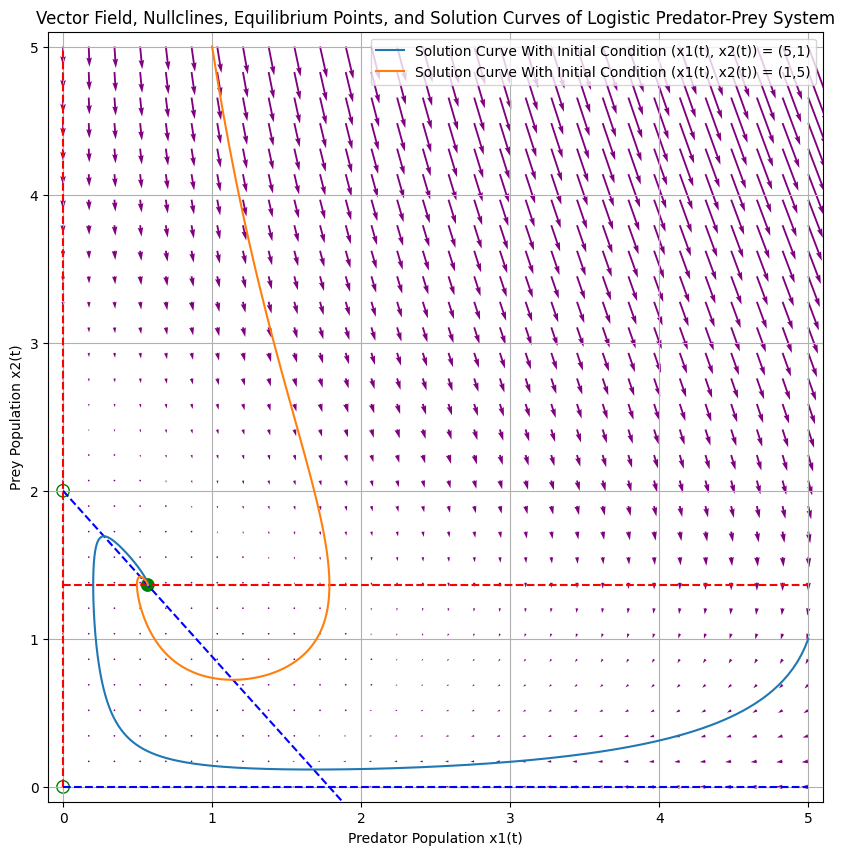

In [6]:
plt.figure(figsize=(10, 10))

#PLOTTING VECTOR FIELD
plt.quiver(x1, x2, u, v, color = 'purple')


#PLOTTING EQUILIBRIUM POINTS
plt.scatter(x=eq_points_x1, y=eq_points_x2, s=80, facecolors=['none', 'none', 'green'], edgecolors='green')

#PLOTTING NULLCLINES
plt.plot(v_nullcline_1[0], v_nullcline_1[1], color='r', linestyle='--')
plt.plot(v_nullcline_2[0], v_nullcline_2[1], color='r', linestyle='--')

plt.plot(h_nullcline_1[0], h_nullcline_1[1], color='b', linestyle='--')
plt.plot(h_nullcline_2[0], h_nullcline_2[1], color='b', linestyle='--')


#PLOTTING SOLUTION CURVES
plt.plot(x1_0, x2_0, label='Solution Curve With Initial Condition (x1(t), x2(t)) = (5,1)')
plt.plot(x1_1, x2_1, label='Solution Curve With Initial Condition (x1(t), x2(t)) = (1,5)')

#BASIC PLOT LABELING AND ALIGNMENT
plt.xlabel("Predator Population x1(t)")
plt.ylabel("Prey Population x2(t)")

plt.xlim((-0.1,5.1))
plt.ylim((-0.1,5.1))

plt.legend(loc="upper right")
plt.title("Vector Field, Nullclines, Equilibrium Points, and Solution Curves of Logistic Predator-Prey System")

plt.grid()
plt.show()

Observing the plot above, we clearly can tell that the only stable equilibrium point of this system is at (0.5618, 1.3636) and that the other equilibrium points (0, 0), and (0, 2) are unstable equilibria. Because of this, our solution curves tend to the stable equilibrium point and curve away from the unstable equilibria. In the plot we see, that both solution curves, regardless of their differing initial conditions, follow the direction of the given vector field and end up at the stable equilibrium point.

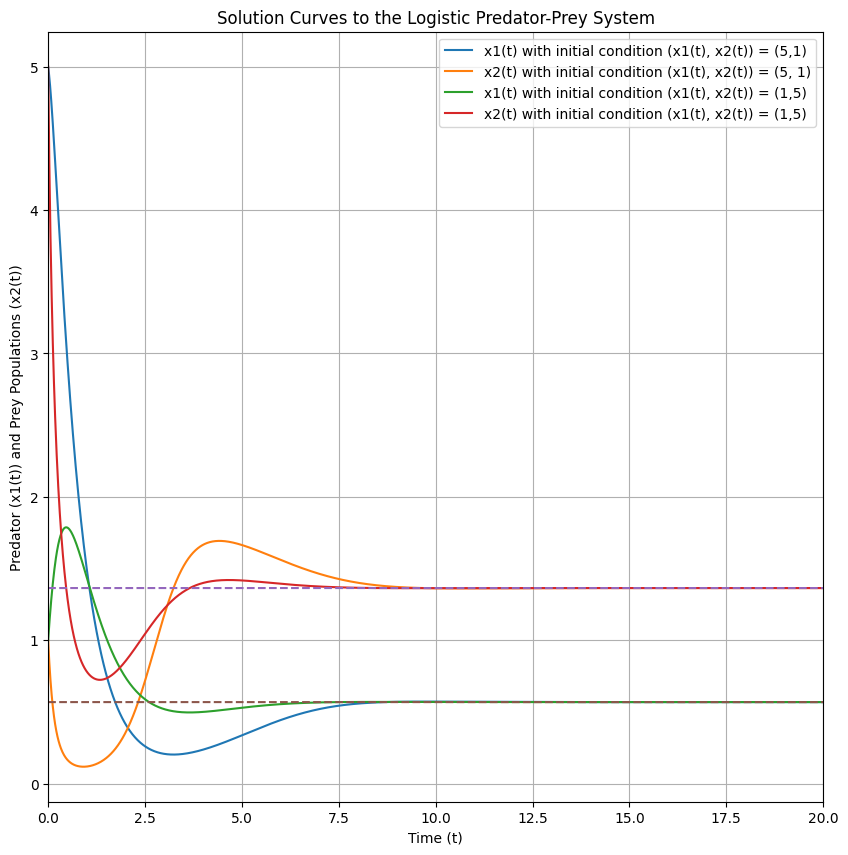

In [7]:
plt.figure(figsize=(10,10))



#PLOTTING SOLUTION CURVES

plt.plot(tRange, x1_0, label='x1(t) with initial condition (x1(t), x2(t)) = (5,1)')
plt.plot(tRange, x2_0, label='x2(t) with initial condition (x1(t), x2(t)) = (5, 1)')
plt.plot(tRange, x1_1, label='x1(t) with initial condition (x1(t), x2(t)) = (1,5)')
plt.plot(tRange, x2_1, label='x2(t) with initial condition (x1(t), x2(t)) = (1,5)')

#PLOTTING ASYMPTOTES
plt.plot(tRange, np.full((2000,), x2_1[1500]), linestyle='--')
plt.plot(tRange, np.full((2000,), x1_0[1500]), linestyle='--')


#BASIC PLOT LABELING AND ALIGNMENT
plt.title("Solution Curves to the Logistic Predator-Prey System")
plt.xlabel("Time (t)")
plt.ylabel("Predator (x1(t)) and Prey Populations (x2(t))")

plt.xlim(0, 20)

plt.grid()
plt.legend(loc="upper right")

All solution curves depicted show asymptotic behavior. x2(t) with the initial condition of (5, 1) and x2(t) with the initial condition of (1, 5) both share a horizontal asymptote at around x2(t) = 1.3636. x1(t) with the initial condition of (5, 1) and x1(t) with the initial condition of (1, 5) both share a different horizontal asymptote at around x1(t) = 0.568. It is important to mention that both of these values represented the stable point of equilibrium (x1(t), x2(t)) on our previous graph so this behavior is supported by our previous conclusions.

All the curves share the behavior that if they are below or above their respective asymptote, the population will "adjust" itself to reach that state of equilibrium. For example both the blue curve and red curve above start high above their states of equilibria respectively and so they decrease quite rapidly until they go under the state of equilibrium and then "correct" themselves back to stability. The green curve does something similar as it starts out above it's equilibrium state, but it does increase at first and then quickly decreases back to stability. The orange curve starts out below it's equilibrium population and decreases until around t = 2 where it rebounds and increases back up to stability.